# Unit 2 Challenge: Preparing a dataset for modeling

##### Task description:
Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

## The Dataset:
Levin Vehicle Telematics with
Vehicle and Driving Data
* https://www.kaggle.com/yunlevin/levin-vehicle-telematics/version/3#v2.csv
* https://github.com/YunSolutions/levin-openData


#### Context
The dataset provided here is a sample data for data we collect real-time. This dataset is collected for over a 4 month period on 23 4-wheelers. We collect OBD data at 1Hz frequency (1 record per second) while accelerometer data is collected at 25 hz (25 data points per second)

This metadata includes – Device Id, timestamp, trip id, accelerometer data, speed gathered from GPS, battery voltage, coolant temperature, diagnostic trouble codes, engine load, intake air temperature, manifold absolute pressure, calculated mileage, mass airflow, engine RPM, speed collected from OBD, timing advance, throttle positions

1. Device Id – Each device has a unique identifier. Device and Car is one to one mapping 
2. Time Stamp – Time stamp refers to time. The value corresponds to data collected in that very second. Format – Year – Month – Day Hrs:Min:Sec 
3. Trip ID – The trip id corresponds to 1 trip, Trip begins when engine is switched on and end when car engine is switched off. 
4. accData – Refers to Accelerometer and Magnetometer sensor data. The data is collected from the OBD device, values are in terms of G-force. The data is across X, Y, Z axis where X-axis is horizontal, Y- axis is vertical and Z-axis is the direction of movement of the car. The data is provided in raw format. To extract values, please use following formular 
5. gps_speed – The speed in kmph as noted from GPS sensor 
6. battery – The battery voltage corresponds to voltage of the battery installed in Car, which supplies electrical energy to a motor vehicle. 
7. cTemp – The Temperature of the engine coolant of an internal combustion engine. The normal operating temperature for most engines is in a range of 90 to 104 degree Celsius (195 to 220 degrees Fahrenheit) 
8. dtc – Number of diagnostic trouble codes. DTC's, or Diagnostic Trouble Codes, are used by automobile manufacturers to diagnose problems related to the vehicle. 
9. eLoad - Engine load measures how much air (and fuel) you're sucking into the engine and then compares that value to the theoretical maximum. 
10. iat - The Intake Air Temperature sensor (IAT) has been utilised as an Engine Control Unit (ECU) input signal, as a requirement for calculating the Air Mass volume for the incoming air charge. This is, to assist in determining the correct engine fuel requirement to suit the operating air temperature. 
11. imap - The manifold absolute pressure sensor (MAP sensor) is one of the sensors used in an internal combustion engine's electronic control system. The manifold absolute pressure sensor provides instantaneous manifold pressure information to the engine's electronic control unit (ECU). The data is used to calculate air density and determine the engine's air mass flow rate, which in turn determines the required fuel metering for optimum combustion (see stoichiometry) and influence the advance or retard of ignition timing. 
12. kpl – KMPL is mileage in kilometres per litre. It is a derived metric derived from speed and fuel to air mass flow ratio. This ratio is constant in case of Petrol cars while changes for other Fuel types. Hence, the KMPL value is accurate for petrol cars, and contain some error in case of other fuel types. 
13. maf - A mass (air) flow sensor (MAF) is used to find out the mass flow rate of air entering a fuel-injected internal combustion engine. The air mass information is necessary for the engine control unit (ECU) to balance and deliver the correct fuel mass to the engine. 
14. rpm – RPM here means engine RPM. 
15. speed – Speed data as collected from OBD device mounted in the car. 
16. tAdv – Timing advance refers to the number of degrees before top dead center (BTDC) that the spark will ignite the air-fuel mixture in the combustion chamber during the compression stroke. 
17. tPos – Refers to throttle position  

In [1]:
import numpy as np
import pandas as pd
pd.set_option('float_format', '{:.2f}'.format)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
"""
AWS Sagemaker notebook config
#############################
import boto3
bucket='thinkful-rk'
data_file = 'telematic_v2.csv'
data_location = 's3://{}/{}'.format(bucket, data_file)
df = pd.read_csv(data_location)
"""

df = pd.read_csv("../Datasets/telematic_v2.csv")
# remove the rows where you have the CSV headers in the dataset because of the simple concatenation of multiple CSVs
df = df[df['gps_speed'] != 'gps_speed']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Exploring the data

In [3]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['battery'] = pd.to_numeric(df['battery'])
df['gps_speed'] = pd.to_numeric(df['gps_speed'])
df['cTemp'] = pd.to_numeric(df['cTemp'])
df['eLoad'] = pd.to_numeric(df['eLoad'])
df['iat'] = pd.to_numeric(df['iat'])
df['imap'] = pd.to_numeric(df['imap'])
df['kpl'] = pd.to_numeric(df['kpl'])
df['maf'] = pd.to_numeric(df['maf'])
df['rpm'] = pd.to_numeric(df['rpm'])
df['speed'] = pd.to_numeric(df['speed'])
df['tAdv'] = pd.to_numeric(df['tAdv'])
df['tPos'] = pd.to_numeric(df['tPos'])
## print(df.info())
df.describe(include='all')

,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos
count,3120240.00,3120240.00,3120240,3120240.00,3120240.00,3120240.00,3120240.00,3120240.00,3120240.00,3120240.00,3120240.00,3120240.00,3120240.00,3120240.00,3120240.00,3120240.00,3120240.00
unique,693.00,23.00,1740022,1811224.00,nan,nan,nan,5.00,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,67.00,12.00,2017-12-14 18:51:22,0.00,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,34488.00,655360.00,10,425984.00,nan,nan,nan,2399305.00,nan,nan,nan,nan,nan,nan,nan,nan,nan
first,nan,nan,2017-11-18 16:23:30,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
last,nan,nan,2018-01-31 23:18:50,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,nan,nan,NaN,nan,24.10,2.40,60.95,nan,30.93,26.15,71.91,5.48,7.92,968.86,22.64,1.88,12.44
std,nan,nan,NaN,nan,26.19,5.22,34.46,nan,27.70,15.55,49.33,9.14,8.63,672.83,25.31,7.36,25.13
min,nan,nan,NaN,nan,0.00,0.00,-40.00,nan,0.00,-40.00,0.00,0.00,0.00,0.00,0.00,-25.00,0.00
25%,nan,nan,NaN,nan,0.00,0.00,42.00,nan,0.00,19.00,10.00,0.00,0.00,702.00,0.00,0.00,0.00


In [4]:
df.head(5)

,tripID,deviceID,timeStamp,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos
0,1,0.00,2017-12-22 18:43:05,10c0f8e00448fa18c80515d30000000000000000000000...,24.26,0.00,66.00,0.00,28.63,40.00,97.00,0.00,0.00,1010.75,23.00,0.00,0.00
1,1,0.00,2017-12-22 18:43:06,1138f8c804780a1ebdf718bcf919d10617c8e301b31017...,23.15,0.00,66.00,0.00,33.73,40.00,98.00,0.00,0.00,815.50,21.00,0.00,0.00
2,1,0.00,2017-12-22 18:43:07,10f0f89804480612c30010c30714ce0520b7f41dbdf118...,18.71,0.00,66.00,0.00,43.14,40.00,98.00,0.00,0.00,862.25,17.00,0.00,0.00
3,1,0.00,2017-12-22 18:43:08,10d0f84804480d15bd0210c9f822c80017caf81ccd0517...,16.48,0.00,66.00,0.00,41.57,40.00,97.00,0.00,0.00,817.00,17.00,0.00,0.00
4,1,0.00,2017-12-22 18:43:09,1090f8c80480041dc9081cc50815c60511c60112c40514...,17.41,0.00,66.00,0.00,43.14,40.00,97.00,0.00,0.00,804.25,15.00,0.00,0.00


### Univariate
How many variables do I have? 
* 16

How many datapoints? 
* 3120240

Which variables are continuous?
* accData	
* gps_speed	
* battery	
* cTemp	
* eLoad	
* iat	
* imap	
* kpl	
* maf
* rpm	
* speed	
* tAdv	
* tPos

and which are categorical?
* dtc
* deviceID


Do I have missing data? If so, how much?
* no missing data, but a lot of values with "0.00"

How much variance is there in each of my variables? 

In [6]:
df.var()

gps_speed      686.10
battery         27.25
cTemp         1187.80
eLoad          767.31
iat            241.79
imap          2433.27
kpl             83.50
maf             74.42
rpm         452705.93
speed          640.50
tAdv            54.12
tPos           631.40
dtype: float64

### Bivariate

           gps_speed  battery  cTemp  eLoad   iat  imap   kpl   maf   rpm  \
gps_speed       1.00     0.01   0.48   0.34  0.28  0.53  0.44  0.53  0.74   
battery         0.01     1.00   0.23   0.15  0.23 -0.37  0.36 -0.17  0.21   
cTemp           0.48     0.23   1.00   0.52  0.87  0.68  0.33  0.47  0.72   
eLoad           0.34     0.15   0.52   1.00  0.49  0.51  0.11  0.38  0.48   
iat             0.28     0.23   0.87   0.49  1.00  0.61  0.22  0.31  0.57   
imap            0.53    -0.37   0.68   0.51  0.61  1.00  0.08  0.69  0.65   
kpl             0.44     0.36   0.33   0.11  0.22  0.08  1.00  0.17  0.43   
maf             0.53    -0.17   0.47   0.38  0.31  0.69  0.17  1.00  0.60   
rpm             0.74     0.21   0.72   0.48  0.57  0.65  0.43  0.60  1.00   
speed           0.95     0.03   0.51   0.39  0.30  0.56  0.46  0.57  0.79   
tAdv            0.08     0.55   0.13   0.14  0.11 -0.20  0.03 -0.08  0.25   
tPos            0.13     0.13   0.23   0.07  0.15  0.20  0.08  0.35  0.29   

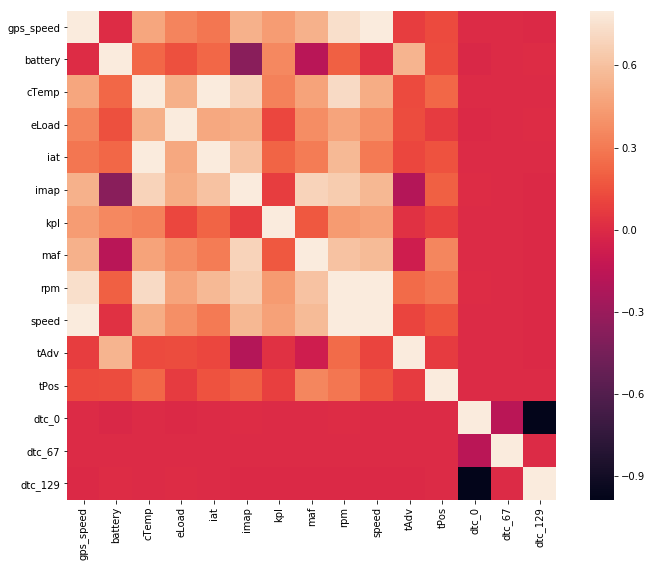

In [41]:
# Make the correlation matrix.
corrmat = df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

## Outcome var: dtc (diagnostic trouble codes)

### Cleaning

In [15]:
df.dtc.unique()

array([0.0, '0.0', '0', 67.0, 129.0], dtype=object)

In [25]:
new_features = pd.DataFrame()
new_features['dtc_0'] = np.where(np.logical_or(df['dtc'] == '0.0', df['dtc'] == '0'), 0.0, df['dtc'])
new_features['dtc_0'] = np.where(new_features['dtc_0'] == 0.0 , 1, 0)
new_features['dtc_67'] = np.where(df['dtc'] == 67.0 , 1, 0)
new_features['dtc_129'] = np.where(df['dtc'] == 129.0 , 1, 0)

### 10 new features:

In [8]:
morning = pd.Timestamp(2000, 1, 1, 9, 0, 0).time()
noon = pd.Timestamp(2000, 1, 1, 12, 0, 0).time()
afternoon = pd.Timestamp(2000, 1, 1, 15, 0, 0).time()
evening = pd.Timestamp(2000, 1, 1, 19, 0, 0).time()
midnight = pd.Timestamp(2000, 1, 1, 0, 0, 1).time()

In [36]:
# 1. Creating non linear relationships
new_features['eLoad_squared'] = df['eLoad'] * df['eLoad']
# 2.-5. Convert time (continues scale) to 4 classes to represent different time zones 
new_features['morning_driving'] = np.where(np.logical_and(df['timeStamp'].dt.time > midnight, df['timeStamp'].dt.time <= morning) , 1, 0)
new_features['noon_driving'] = np.where(np.logical_and(df['timeStamp'].dt.time > morning, df['timeStamp'].dt.time <= afternoon) , 1, 0)
new_features['evening_driving'] = np.where(np.logical_and(df['timeStamp'].dt.time > afternoon, df['timeStamp'].dt.time <= evening) , 1, 0)
new_features['night_driving'] = np.where(df['timeStamp'].dt.time > evening, 1, 0)
# 6.-7. Convert battery charging percentage (continues scale) to binary classes 
new_features['battery_empty'] = np.where(df['battery'] <= 15.0, 1, 0)
new_features['battery_full'] = np.where(df['battery'] > 15.0, 1, 0)
#8.-10.
# The normal operating temperature for most engines is in a range of 90 to 104 degree Celsius
# Create classes to represent abnormal engine temperature and the normal
new_features['cTemp_low'] = np.where(df['cTemp'] < 90, 1, 0)
new_features['cTemp_normal'] = np.where(np.logical_and(df['cTemp'] >= 90, df['cTemp'] <= 104 ), 1, 0)
new_features['cTemp_toohigh'] = np.where(df['cTemp'] > 104, 1, 0)


In [37]:
new_features.describe()

,dtc_0,dtc_67,dtc_129,eLoad_squared,morning_driving,noon_driving,evening_driving,night_driving,battery_empty,battery_full,cTemp_low,cTemp_normal,cTemp_toohigh
count,3120240.00,3120240.00,3120240.00,3120208.00,3120240.00,3120240.00,3120240.00,3120240.00,3120240.00,3120240.00,3120240.00,3120240.00,3120240.00
mean,1.00,0.00,0.00,1724.06,0.13,0.41,0.30,0.16,1.00,0.00,0.78,0.22,0.00
std,0.00,0.00,0.00,2265.61,0.34,0.49,0.46,0.37,0.00,0.00,0.41,0.41,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
50%,1.00,0.00,0.00,732.18,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
75%,1.00,0.00,0.00,2480.43,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
max,1.00,1.00,1.00,9921.71,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


### Note:
feature cTemp_xxxxx is not supporting the assumption "The normal operating temperature for most engines is in a range of 90 to 104 degree Celsius". Allmost all values are lower than 90

## Feature Seleciton
Use the filter method and choose features with a specific correlation to DTCs.

                 dtc_0  dtc_67  dtc_129  eLoad_squared  morning_driving  \
dtc_0             1.00   -0.17    -0.99          -0.00             0.00   
dtc_67           -0.17    1.00    -0.00           0.00            -0.00   
dtc_129          -0.99   -0.00     1.00           0.00            -0.00   
eLoad_squared    -0.00    0.00     0.00           1.00            -0.02   
morning_driving   0.00   -0.00    -0.00          -0.02             1.00   
noon_driving      0.00    0.00    -0.00           0.04            -0.32   
evening_driving  -0.01   -0.00     0.01          -0.00            -0.25   
night_driving     0.00   -0.00    -0.00          -0.03            -0.17   
battery_empty    -0.00    0.00     0.00           0.00            -0.00   
battery_full      0.00   -0.00    -0.00          -0.00             0.00   
cTemp_low        -0.00    0.00     0.00          -0.22             0.12   
cTemp_normal      0.00   -0.00    -0.00           0.22            -0.12   
cTemp_toohigh      nan   

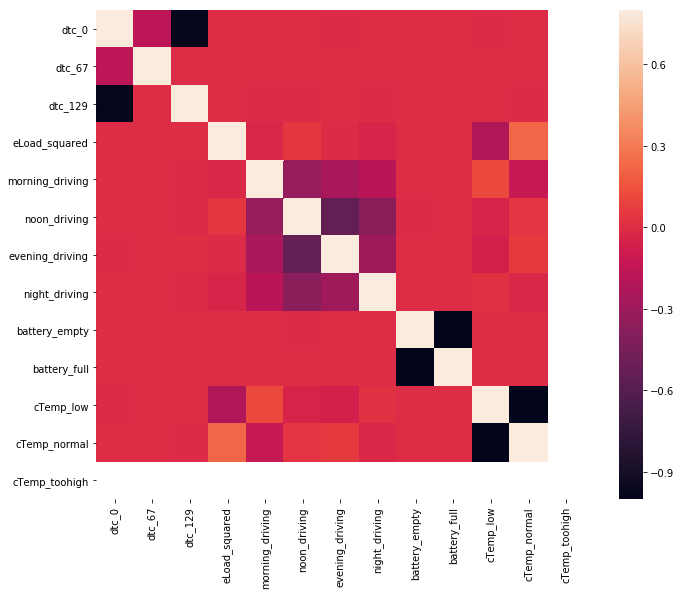

In [38]:
# Make the correlation matrix.
corrmat = new_features.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [39]:
df['dtc_0'] = np.where(np.logical_or(df['dtc'] == '0.0', df['dtc'] == '0'), 0.0, df['dtc'])
df['dtc_0'] = np.where(df['dtc_0'] == 0.0 , 1, 0)
df['dtc_67'] = np.where(df['dtc'] == 67.0 , 1, 0)
df['dtc_129'] = np.where(df['dtc'] == 129.0 , 1, 0)

           gps_speed  battery  cTemp  eLoad   iat  imap   kpl   maf   rpm  \
gps_speed       1.00     0.01   0.48   0.34  0.28  0.53  0.44  0.53  0.74   
battery         0.01     1.00   0.23   0.15  0.23 -0.37  0.36 -0.17  0.21   
cTemp           0.48     0.23   1.00   0.52  0.87  0.68  0.33  0.47  0.72   
eLoad           0.34     0.15   0.52   1.00  0.49  0.51  0.11  0.38  0.48   
iat             0.28     0.23   0.87   0.49  1.00  0.61  0.22  0.31  0.57   
imap            0.53    -0.37   0.68   0.51  0.61  1.00  0.08  0.69  0.65   
kpl             0.44     0.36   0.33   0.11  0.22  0.08  1.00  0.17  0.43   
maf             0.53    -0.17   0.47   0.38  0.31  0.69  0.17  1.00  0.60   
rpm             0.74     0.21   0.72   0.48  0.57  0.65  0.43  0.60  1.00   
speed           0.95     0.03   0.51   0.39  0.30  0.56  0.46  0.57  0.79   
tAdv            0.08     0.55   0.13   0.14  0.11 -0.20  0.03 -0.08  0.25   
tPos            0.13     0.13   0.23   0.07  0.15  0.20  0.08  0.35  0.29   

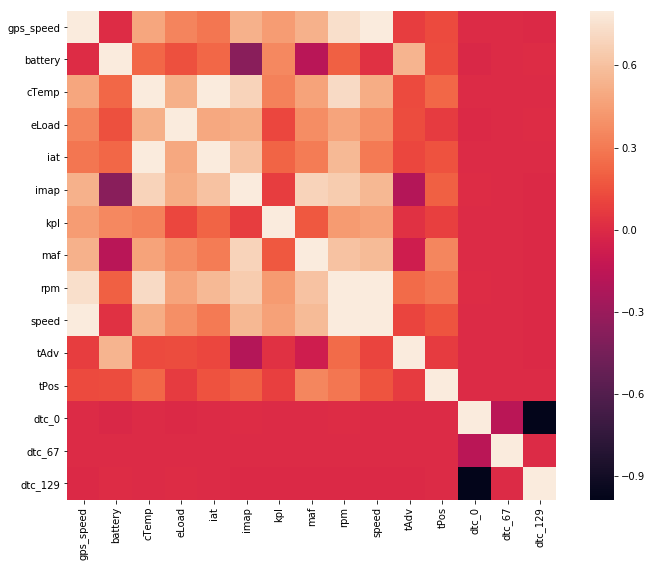

In [40]:
# Make the correlation matrix.
corrmat = df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

### Conclusion
There is no correlation found for the outcome variable "dtc". Therefore no feature will be selected for further modeling. With this result this experiment comes to an end. 